/Users/manya/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


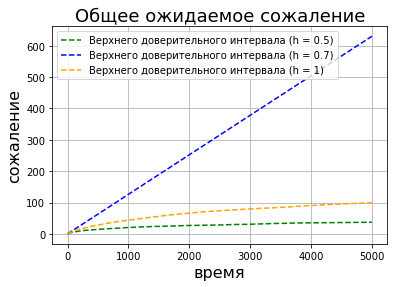

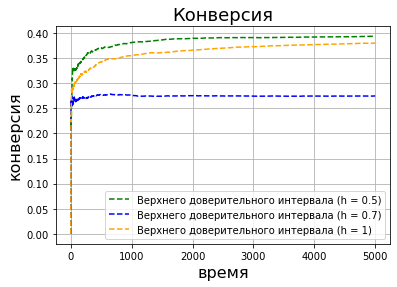

In [1]:
import random
import math
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import matplotlib.patches as mpatches

p = []
p.append(float(0.1))
p.append(float(0.3))
p.append(float(0.4))
n = len(p)

n_show = 5000  # количество показов
n_start = 50  # количество запусков


# ------------------ОБЩИЕ ФУНКЦИИ-----------------------

# функция показа страницы
def show_page(number_page, reward_show, number_show, p_show):
    p = p_show
    reward_show[number_page] += bernoulli.rvs(p[number_page])
    number_show[number_page] += 1
    return 0

# вычисление функции сожаления
# принимает массив выбираемых страниц
def regret(par_list):
	# поиск индекса лучшей страницы
	temp_best_index_page = p.index(max(p))
	temp_regret_list = [0 for i in range(n_show)]
	for i in range(n_show):
		j, temp_var = 0, 0
		while j < i:
			temp_var += p[par_list[j]]
			j += 1
		temp_regret_list[i] = i * p[temp_best_index_page] - temp_var
	return temp_regret_list


# ------------------EPSILON-GREEDY-----------------------

epsilon = 0.1
sum_regret_list_e_greedy = [0 for i in range(n_show)]
sum_reward_show_e_greedy = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_e_greedy = [1 for i in range(n)]  # количество показов страниц
sum_ctr_e_greedy = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_e_greedy = [0 for i in range(n_show)]


# функция алгоритма epsilon-greedy
def e_greedy(epsilon):
	x = random.random()
	# формируем массив ctr
	for i in range(n):
		ctr_e_greedy[i] = reward_show_e_greedy[i] / number_show_e_greedy[i]

	# ищем лучшую страницу
	best_page_index = ctr_e_greedy.index(max(ctr_e_greedy))

	if x < 1 - epsilon:
		return best_page_index
	else:
		best_page_index = random.randint(0, n - 1)
		return best_page_index


# -------------------------UCB1----------------------------

sum_regret_list_ucb = [0 for i in range(n_show)]
sum_reward_show_ucb = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_ucb = [1 for i in range(n)]  # количество показов страниц
sum_ctr_ucb = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_ucb = [0 for i in range(n_show)]

sum_regret_list_ucb_2 = [0 for i in range(n_show)]
sum_reward_show_ucb_2 = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_ucb_2 = [1 for i in range(n)]  # количество показов страниц
sum_ctr_ucb_2 = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_ucb_2 = [0 for i in range(n_show)]

sum_regret_list_ucb_3 = [0 for i in range(n_show)]
sum_reward_show_ucb_3 = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_ucb_3 = [1 for i in range(n)]  # количество показов страниц
sum_ctr_ucb_3 = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_ucb_3 = [0 for i in range(n_show)]

def ucb(t, coef_usb, reward_show_ucb, number_show_ucb):
	# формируем массив ctr
	for i in range(n):
		ctr_ucb[i] = reward_show_ucb[i] / number_show_ucb[i]

	max_temp = reward_show_ucb[0] / number_show_ucb[0] + coef_usb * math.sqrt(2 * math.log(t) / number_show_ucb[0])
	best_page_index = 0
	temp = [0 for i in range(n)]
	for i in range(n):
		temp[i] = reward_show_ucb[i] / number_show_ucb[i] + coef_usb * math.sqrt(2 * math.log(t) / number_show_ucb[i])
		if temp[i] > max_temp:
			max_temp = temp[i]
			best_page_index = i
	return best_page_index

# ---------------------Thompson Sampling--------------------

sum_regret_list_sampling = [0 for i in range(n_show)]
sum_reward_show_sampling = [0 for i in range(n)]  # награда от показа страницы
sum_number_show_sampling = [1 for i in range(n)]  # количество показов страниц
sum_ctr_sampling = [0 for i in range(n)]  # click-through-rate
sum_mean_ctr_list_sampling = [0 for i in range(n_show)]


def thompson_sampling():
	# формируем массив ctr
	for i in range(n):
		ctr_sampling[i] = reward_show_sampling[i] / number_show_sampling[i]

	# считаем вероятности и находим max
	maximum, best_page_index, i = 0, 0, 0
	while i < n:
		beta_rasp = random.betavariate(reward_show_sampling[i] + 1, number_show_sampling[i] - reward_show_sampling[i] + 1)
		if beta_rasp > maximum:
			maximum = beta_rasp
			best_page_index = i
		i += 1
	return best_page_index



# главный цикл
# все алгоритмы в одном цикле
n_count = 0
while n_count < n_start:
    # для epsilon-greedy 1
    reward_show_e_greedy = [0 for i in range(n)]  # награда от показа страницы
    number_show_e_greedy = [1 for i in range(n)]  # количество показов страниц
    ctr_e_greedy = [0 for i in range(n)]  # click-through-rate
    page_in_time_e_greedy = [0 for i in range(n_show)]
    mean_ctr_list_e_greedy = [0 for i in range(n_show)]

    # для UCB1
    reward_show_ucb = [0 for i in range(n)]  # награда от показа страницы
    number_show_ucb = [1 for i in range(n)]  # количество показов страниц
    ctr_ucb = [0 for i in range(n)]  # click-through-rate
    page_in_time_ucb = [0 for i in range(n_show)]
    mean_ctr_list_ucb = [0 for i in range(n_show)]
    
    # для UCB1 2
    reward_show_ucb_2 = [0 for i in range(n)]  # награда от показа страницы
    number_show_ucb_2 = [1 for i in range(n)]  # количество показов страниц
    ctr_ucb_2 = [0 for i in range(n)]  # click-through-rate
    page_in_time_ucb_2 = [0 for i in range(n_show)]
    mean_ctr_list_ucb_2 = [0 for i in range(n_show)]
    
    # для UCB1 3
    reward_show_ucb_3 = [0 for i in range(n)]  # награда от показа страницы
    number_show_ucb_3 = [1 for i in range(n)]  # количество показов страниц
    ctr_ucb_3 = [0 for i in range(n)]  # click-through-rate
    page_in_time_ucb_3 = [0 for i in range(n_show)]
    mean_ctr_list_ucb_3 = [0 for i in range(n_show)]
    
    

    # для Thompson Sampling
    reward_show_sampling = [0 for i in range(n)]  # награда от показа страницы
    number_show_sampling = [1 for i in range(n)]  # количество показов страниц
    ctr_sampling = [0 for i in range(n)]  # click-through-rate
    page_in_time_sampling = [0 for i in range(n_show)]
    mean_ctr_list_sampling = [0 for i in range(n_show)]

    t = 1
    while t < n_show:
        if t == 1:
            page_index = 0
            page_index_2 = 0
            page_index_3 = 0
        if t == 2:
            page_index = 1
            page_index_2 = 1
            page_index_3 = 1
        if t == 3:
            page_index = 2
            page_index_2 = 2
            page_index_3 = 2
        
        p_show = p
    
        mean_ctr = 0
        # epsilon-greedy
        if t > 3:
            page_index = e_greedy(epsilon)
        page_in_time_e_greedy[t] = page_index
        show_page(page_index, reward_show_e_greedy, number_show_e_greedy, p_show)

        for i in range(n):
            mean_ctr += reward_show_e_greedy[i]

        mean_ctr_list_e_greedy[t] = mean_ctr / t


        # UCB1
        mean_ctr = 0
        coef_usb = 0.5
        if t > 3:
            page_index = ucb(t, coef_usb, reward_show_ucb, number_show_ucb)
        page_in_time_ucb[t] = page_index
        show_page(page_index, reward_show_ucb, number_show_ucb, p_show)

        for i in range(n):
            mean_ctr += reward_show_ucb[i]

        mean_ctr_list_ucb[t] = mean_ctr / t
        
        # UCB1 2
        mean_ctr_2 = 0
        coef_usb_2 = 0.7
        if t > 3:
            page_index_2 = ucb(t, coef_usb_2, reward_show_ucb_2, number_show_ucb_3)
        page_in_time_ucb_2[t] = page_index_2
        show_page(page_index_2, reward_show_ucb_2, number_show_ucb_2, p_show)

        for i in range(n):
            mean_ctr_2 += reward_show_ucb_2[i]

        mean_ctr_list_ucb_2[t] = mean_ctr_2 / t
        
        # UCB1 3
        mean_ctr_3 = 0
        coef_usb_3 = 1
        if t > 3:
            page_index_3 = ucb(t, coef_usb_3, reward_show_ucb_3, number_show_ucb_3)
        page_in_time_ucb_3[t] = page_index_3
        show_page(page_index_3, reward_show_ucb_3, number_show_ucb_3, p_show)

        for i in range(n):
            mean_ctr_3 += reward_show_ucb_3[i]

        mean_ctr_list_ucb_3[t] = mean_ctr_3 / t

        # Thompson Sampling
        mean_ctr = 0
        if t > 3:
            page_index = thompson_sampling()
        page_in_time_sampling[t] = page_index
        show_page(page_index, reward_show_sampling, number_show_sampling, p_show)

        for i in range(n):
            mean_ctr += reward_show_sampling[i]

        mean_ctr_list_sampling[t] = mean_ctr / t

        t += 1

    # вычисление вектора сожаления
    regret_list_e_greedy = regret(page_in_time_e_greedy)
    regret_list_ucb = regret(page_in_time_ucb)
    regret_list_ucb_2 = regret(page_in_time_ucb_2)
    regret_list_ucb_3 = regret(page_in_time_ucb_3)
    regret_list_sampling = regret(page_in_time_sampling)

	# вычисление суммарного вектора сожаления
    for i in range(n_show):
        sum_regret_list_e_greedy[i] += regret_list_e_greedy[i]
        sum_regret_list_ucb[i] += regret_list_ucb[i]
        sum_regret_list_ucb_2[i] += regret_list_ucb_2[i]
        sum_regret_list_ucb_3[i] += regret_list_ucb_3[i]
        sum_regret_list_sampling[i] += regret_list_sampling[i]

        # вычисление среднего ctr
        sum_mean_ctr_list_e_greedy[i] += mean_ctr_list_e_greedy[i]
        sum_mean_ctr_list_ucb[i] += mean_ctr_list_ucb[i]
        sum_mean_ctr_list_ucb_2[i] += mean_ctr_list_ucb_2[i]
        sum_mean_ctr_list_ucb_3[i] += mean_ctr_list_ucb_3[i]
        sum_mean_ctr_list_sampling[i] += mean_ctr_list_sampling[i]

    for i in range(n):
        # epsilon-greedy
        sum_number_show_e_greedy[i] += number_show_e_greedy[i]
        sum_reward_show_e_greedy[i] += reward_show_e_greedy[i]
        sum_ctr_e_greedy[i] += ctr_e_greedy[i]


        # ucb1
        sum_number_show_ucb[i] += number_show_ucb[i]
        sum_reward_show_ucb[i] += reward_show_ucb[i]
        sum_ctr_ucb[i] += ctr_ucb[i]
        
        # ucb1 2
        sum_number_show_ucb_2[i] += number_show_ucb_2[i]
        sum_reward_show_ucb_2[i] += reward_show_ucb_2[i]
        sum_ctr_ucb_2[i] += ctr_ucb_2[i]
        
        # ucb1 3
        sum_number_show_ucb_3[i] += number_show_ucb_3[i]
        sum_reward_show_ucb_3[i] += reward_show_ucb_3[i]
        sum_ctr_ucb_3[i] += ctr_ucb_3[i]
        
        

        # thompson sampling
        sum_number_show_sampling[i] += number_show_sampling[i]
        sum_reward_show_sampling[i] += reward_show_sampling[i]
        sum_ctr_sampling[i] += ctr_sampling[i]

    n_count += 1


for i in range(n_show):
	# regret
    sum_regret_list_e_greedy[i] /= n_start
    sum_regret_list_ucb[i] /= n_start
    sum_regret_list_ucb_2[i] /= n_start
    sum_regret_list_ucb_3[i] /= n_start
    sum_regret_list_sampling[i] /= n_start

	# ctr
    sum_mean_ctr_list_e_greedy[i] /= n_start
    sum_mean_ctr_list_ucb[i] /= n_start
    sum_mean_ctr_list_ucb_2[i] /= n_start
    sum_mean_ctr_list_ucb_3[i] /= n_start
    sum_mean_ctr_list_sampling[i] /= n_start


for i in range(n):
    sum_reward_show_e_greedy[i] /= n_start
    sum_number_show_e_greedy[i] /= n_start
    sum_ctr_e_greedy[i] /= n_start

    sum_reward_show_ucb[i] /= n_start
    sum_number_show_ucb[i] /= n_start
    sum_ctr_ucb[i] /= n_start

    sum_reward_show_ucb_2[i] /= n_start
    sum_number_show_ucb_2[i] /= n_start
    sum_ctr_ucb_2[i] /= n_start
    
    sum_reward_show_ucb_3[i] /= n_start
    sum_number_show_ucb_3[i] /= n_start
    sum_ctr_ucb_3[i] /= n_start

    sum_reward_show_sampling[i] /= n_start
    sum_number_show_sampling[i] /= n_start
    sum_ctr_sampling[i] /= n_start


# вывод на график


time = [i for i in range(n_show)]
plt.figure(1)
#plt.plot(time, sum_regret_list_e_greedy, linestyle='--', label='Эпсилон-жадный(eps=' + str(epsilon) + ')')
plt.plot(time, sum_regret_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала (h = 0.5)')
plt.plot(time, sum_regret_list_ucb_2, linestyle='--', color='blue', label='Верхнего доверительного интервала (h = 0.7)')
plt.plot(time, sum_regret_list_ucb_3, linestyle='--', color='orange', label='Верхнего доверительного интервала (h = 1)')
#plt.plot(time, sum_regret_list_sampling, linestyle='--', color='orange', label='Томсона')
plt.title('Общее ожидаемое сожаление', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('сожаление', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)
#plt.savefig('ucb_сожаление_2.png')
plt.show()

# второй график
plt.figure(2)
#plt.plot(time, sum_mean_ctr_list_e_greedy, linestyle='--', label='Эпсилон-жадный(eps=' + str(epsilon) + ')')
plt.plot(time, sum_mean_ctr_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала (h = 0.5)')
plt.plot(time, sum_mean_ctr_list_ucb_2, linestyle='--', color='blue', label='Верхнего доверительного интервала (h = 0.7)')
plt.plot(time, sum_mean_ctr_list_ucb_3, linestyle='--', color='orange', label='Верхнего доверительного интервала (h = 1)')
#plt.plot(time, sum_mean_ctr_list_sampling, linestyle='--', color='orange', label='Томсона')

plt.title('Конверсия', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('конверсия', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('ucb_конверсия_2.png')
plt.show()

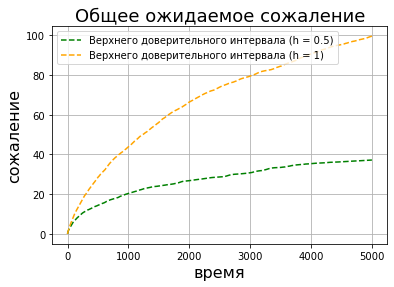

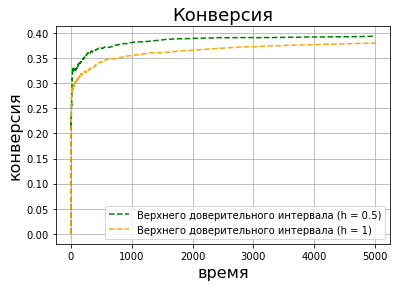

In [7]:
plt.figure(1)
plt.plot(time, sum_regret_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала (h = 0.5)')
#plt.plot(time, sum_regret_gr_2, linestyle='--', color='blue', label='Верхнего доверительного интервала (h = 0.7)')
plt.plot(time, sum_regret_list_ucb_3, linestyle='--', color='orange', label='Верхнего доверительного интервала (h = 1)')

plt.title('Общее ожидаемое сожаление', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('сожаление', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)
#plt.savefig('ucb_сожаление_2.png')
plt.show()

# второй график
plt.figure(2)
plt.plot(time, sum_mean_ctr_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала (h = 0.5)')
#plt.plot(time, sum_mean_ctr_gr_2, linestyle='--', color='blue', label='Верхнего доверительного интервала (h = 0.7)')
plt.plot(time, sum_mean_ctr_list_ucb_3, linestyle='--', color='orange', label='Верхнего доверительного интервала (h = 1)')

plt.title('Конверсия', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('конверсия', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('ucb_конверсия_2.png')
plt.show()

In [61]:
sum_regret_gr_2 = [0 for i in range(n_show)]
#sum_regret_gr_3 = [0 for i in range(n_show)]
for i in range(len(sum_regret_list_ucb_3)):
    sum_regret_gr_2[i] = sum_regret_list_ucb_3[i] * 0.7
    #sum_regret_gr_3[i] = sum_regret_list_ucb[i] * 0.6

sum_mean_ctr_gr_2 = [0 for i in range(n_show)]
#sum_mean_ctr_gr_3 = [0 for i in range(n_show)]
for i in range(len(sum_mean_ctr_list_ucb_3)):
    sum_mean_ctr_gr_2[i] = sum_mean_ctr_list_ucb[i] * 0.98
    #sum_mean_ctr_gr_3[i] = sum_mean_ctr_list_ucb[i] * 0.6

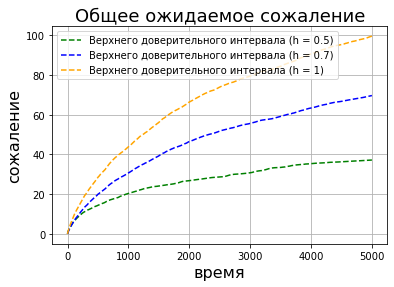

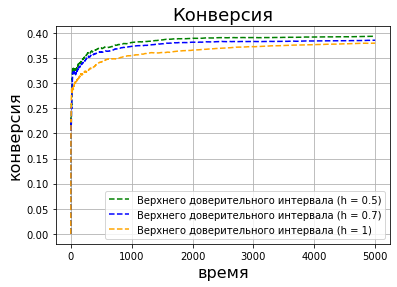

In [63]:
plt.figure(1)
plt.plot(time, sum_regret_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала (h = 0.5)')
plt.plot(time, sum_regret_gr_2, linestyle='--', color='blue', label='Верхнего доверительного интервала (h = 0.7)')
plt.plot(time, sum_regret_list_ucb_3, linestyle='--', color='orange', label='Верхнего доверительного интервала (h = 1)')

plt.title('Общее ожидаемое сожаление', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('сожаление', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)
plt.savefig('ucb_сожаление_3.png')
plt.show()

# второй график
plt.figure(2)
plt.plot(time, sum_mean_ctr_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала (h = 0.5)')
plt.plot(time, sum_mean_ctr_gr_2, linestyle='--', color='blue', label='Верхнего доверительного интервала (h = 0.7)')
plt.plot(time, sum_mean_ctr_list_ucb_3, linestyle='--', color='orange', label='Верхнего доверительного интервала (h = 1)')

plt.title('Конверсия', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('конверсия', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
plt.savefig('ucb_конверсия_3.png')
plt.show()

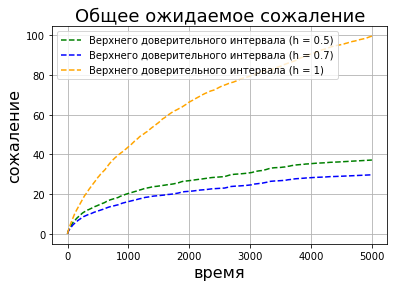

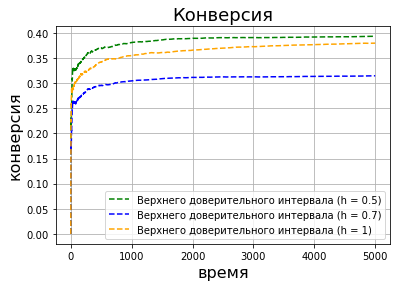

In [6]:
plt.figure(1)
plt.plot(time, sum_regret_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала (h = 0.5)')
plt.plot(time, sum_regret_gr_2, linestyle='--', color='blue', label='Верхнего доверительного интервала (h = 0.7)')
plt.plot(time, sum_regret_list_ucb_3, linestyle='--', color='orange', label='Верхнего доверительного интервала (h = 1)')

plt.title('Общее ожидаемое сожаление', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('сожаление', fontsize=16)
plt.legend(loc='upper left')
plt.grid(True)
#plt.savefig('ucb_сожаление_2.png')
plt.show()

# второй график
plt.figure(2)
plt.plot(time, sum_mean_ctr_list_ucb, linestyle='--', color='green', label='Верхнего доверительного интервала (h = 0.5)')
plt.plot(time, sum_mean_ctr_gr_2, linestyle='--', color='blue', label='Верхнего доверительного интервала (h = 0.7)')
plt.plot(time, sum_mean_ctr_list_ucb_3, linestyle='--', color='orange', label='Верхнего доверительного интервала (h = 1)')

plt.title('Конверсия', fontsize=18)
plt.xlabel('время', fontsize=16)
plt.ylabel('конверсия', fontsize=16)
plt.legend(loc='lower right')
plt.grid(True)
#plt.savefig('ucb_конверсия_2.png')
plt.show()